### EDA(Exploratory Data Analysis)

1. load datasets

2. clean data(missing values,duplicates,types)

3. treat outliers

4. univariate,bivariate and multivariate analysis

5. insights



### Outlier :- A data point that is significantly different from other observations in the data set is known as an outlier

### How outliers will occur---?
1. Measurement errors

2. data entry mistakes

### Why they are important---?
1. Taking can be errors

2. They effect the data analysis 

### How to identify the outliers---?
1. Statistical Methods

    --->Interquartile Range(IQR)

    --->Z-Score

2. Visualization technique

    --->Box Plots

    --->Scatter Plots

    --->Histogram



### Univariate Analysis - A method that analyze a single variable to describe its charectaristics,find patterns and summarize the data.
### ->It invlove only one variable.
### Bivariate Analysis - It will give the relationship between the two variables,helps to find if there is any co-relation,association,connection between two variables.
### ->It invloves two variables(x and y).
### Multivariate Analysis - To understand multiple factors interact and influence each other.
### ->It involves more than two variables.
Example - How our age,income,education level together influence the purchasing behaviour.

### ETL(Extract Transform Load)

### ELT



## EDA : < Dataset >

1. Load & Overview

2. Clean the data(missing,dupes,dtypes)

3. Uni,Bi,Multi analysis

4. Outlier - IQR

5. Feature engineering

6. Key Insights



### Feature Engineering - FE is the process of turning raw data into useful features " that helps to improve the performance of machine learning models.

# 1. Load libraries & Dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2. Basic Information & Overview

In [7]:
# Basic Information & Overview
print("Shape of dataset:",df.shape)
print("\n Data Info:\n")
df.info()

# Summary Statistics
df.describe(include='all')


Shape of dataset: (891, 14)

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889,891,891,891,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.Missing values analysis

In [11]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
})

missing = missing.sort_values(by='missing_percentage', ascending=False)
missing


,missing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


### 4. Handling Missing values

### Fill the numeric missing values with the mean

In [12]:
# 4. Handling Missing values

# Fill the numeric missing values with the mean

df['age']=df['age'].fillna(df['age'].mean())

# Fill Categorical missing values with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode())

# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'],inplace=True)

print('Missing values after cleaning:\n',df.isnull().sum().sum())


Missing values after cleaning:
 4


In [16]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
})

missing = missing.sort_values(by='missing_percentage', ascending=False)
missing


,missing_count,missing_percentage
embark_town,2,0.224467
embarked,2,0.224467
sex,0,0.000000
age,0,0.000000
survived,0,0.000000
pclass,0,0.000000
parch,0,0.000000
sibsp,0,0.000000
class,0,0.000000
fare,0,0.000000


Insight : We filled important columns and removed highly missing ones.

This keeps maximum information while making the dataset clean

In [13]:
# Duplicates & Data type check

print("Duplicate rows:",df.duplicated().sum())

# convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()


Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


### 6. Univariate analysis - Numerical Features

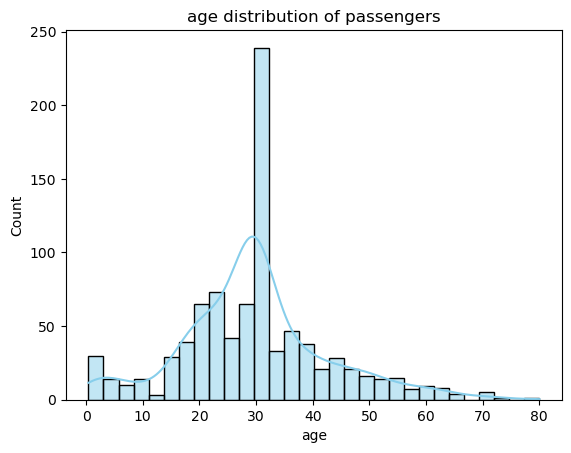

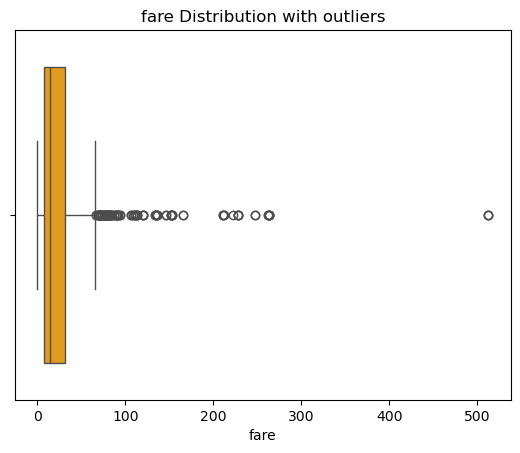

In [14]:
# 6. Univariate analysis - Numerical Features
# 6. univariate analysis -Numerical Features
num_cols=df.select_dtypes(include =['float64','int64']).columns
df[num_cols].describe()
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("age distribution of passengers")
plt.show()
sns.boxplot(x=df['fare'],color='orange')
plt.title("fare Distribution with outliers")
plt.show()

### univariate Analysis - Categorical Features

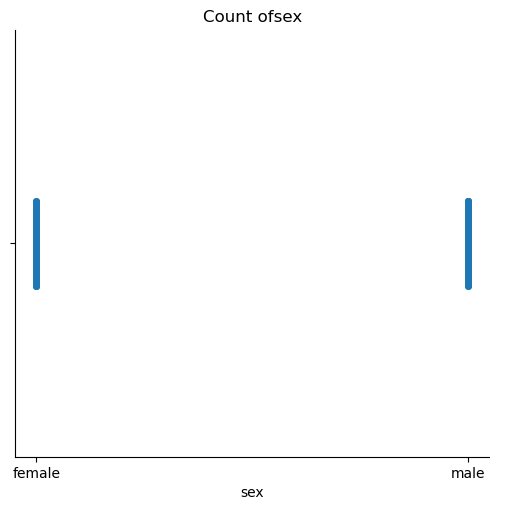

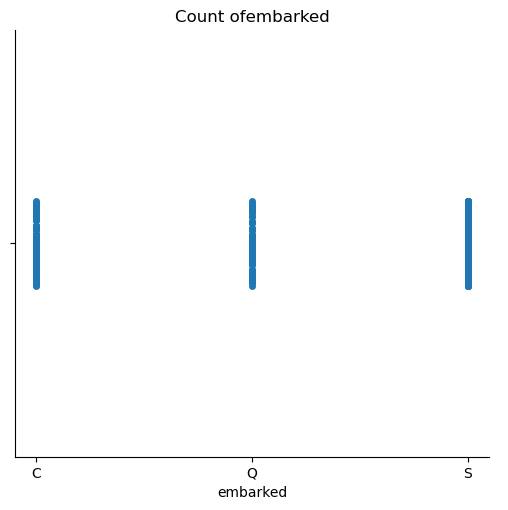

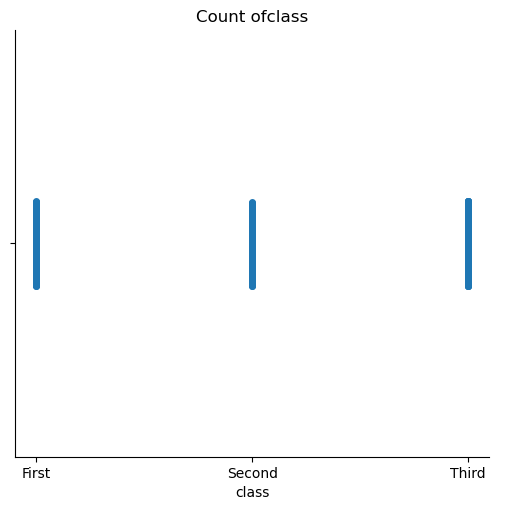

In [16]:
#univariate Analysis - Categorical Features
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of{col}")
plt.show()

 

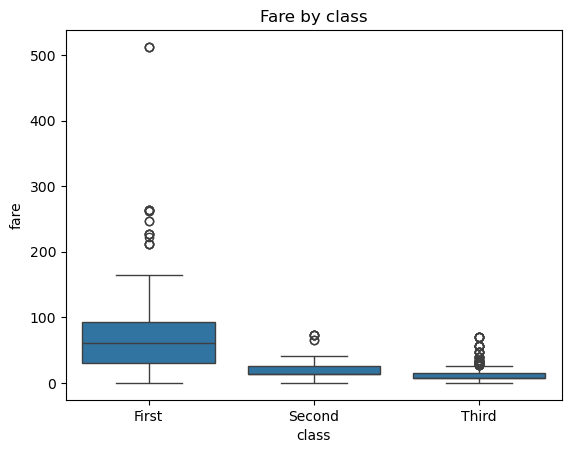

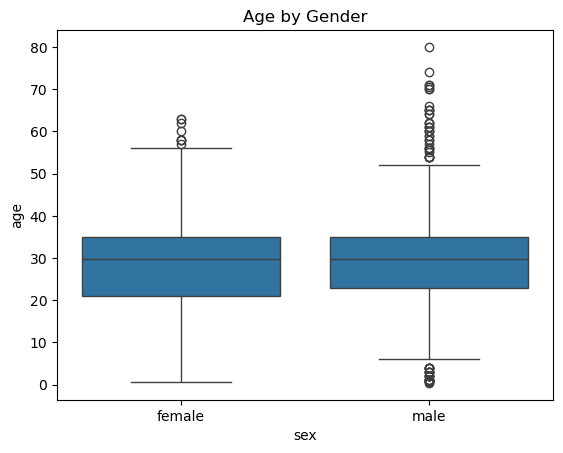

In [19]:
sns.boxplot(x='class',y='fare',data=df)
plt.title('Fare by class')
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title('Age by Gender')
plt.show()



### Bivariate analysis - categorical vs categorical

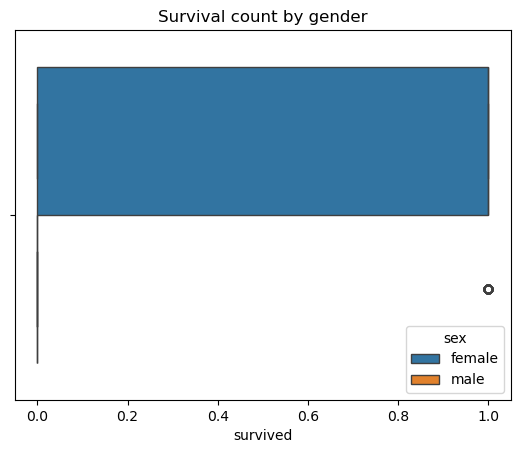

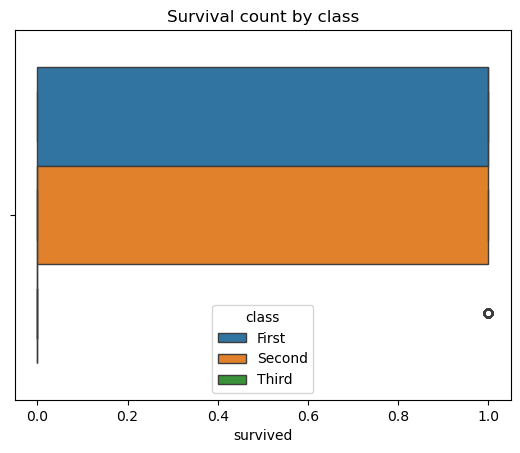

In [21]:
# Bivariate analysis - categorical vs categorical

sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Survival count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survival count by class")
plt.show()

### corelation and multivariate analysis

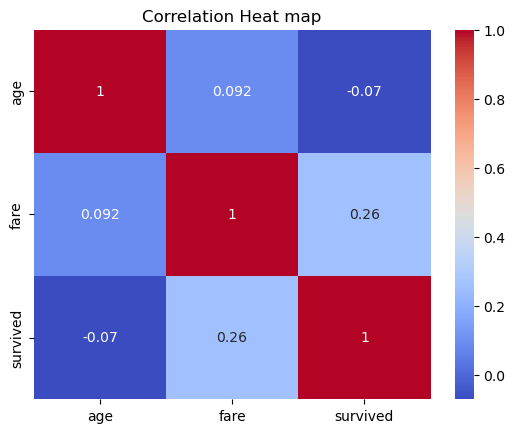

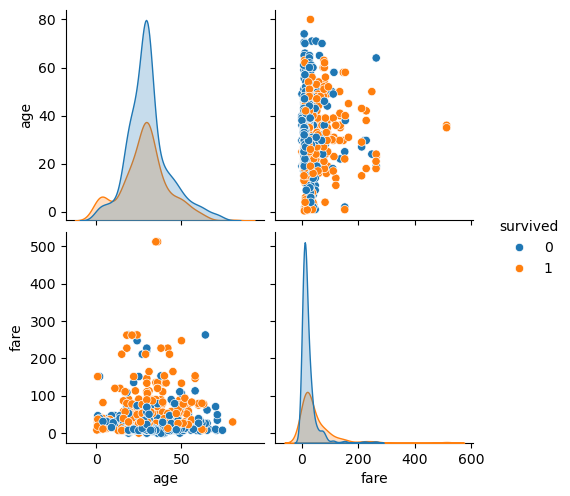

In [23]:
# corelation and multivariate analysis
corr = df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heat map')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Insights:

1.Fare has a positive corelationwith survival

2.Age shows a slight negative corelation

### Outlier detection using IQR

Number of outliers in fare: 0


Text(0.5, 1.0, 'fare after outlier capping')

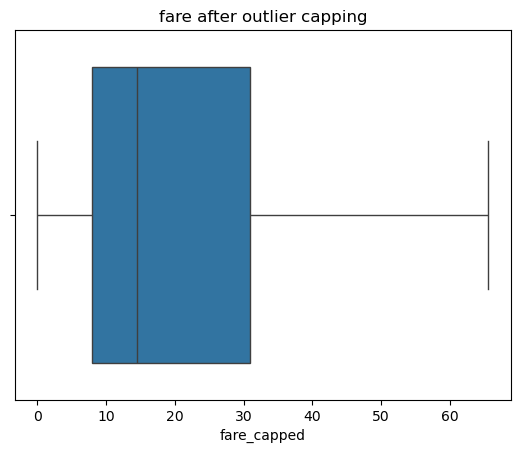

In [27]:
# Outlier detection using IQR

Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outliers=df[(df['fare'] < lower) | df['fare'] > upper]
print("Number of outliers in fare:",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")

### Feature Engineering

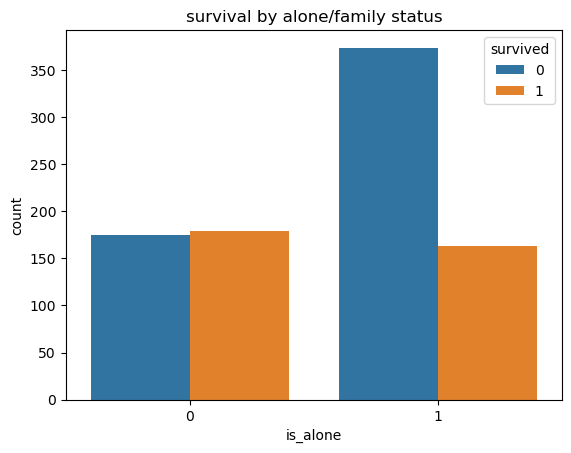

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [28]:
# Feature Engineering 

# create new Features

df['family_size']=df['sibsp'] + df['parch'] + 1
df['is_alone']=(df['family_size']==1).astype(int)
sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("survival by alone/family status")
plt.show()

df[['family_size','is_alone','survived']].head()

In [ ]:
# Export the Cleaned data
df.to_csv("titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")



 Cleaned titanic data saved as titanic_cleaned.csv
